### *"I've failed over and over and over again in my life. And that is why I succeed."*
*-Michael Jordan*

Michael is right. We learn more from being wrong than being right.  

So dare to be wrong (and maybe even right!) when attempting these problems for the first time.  The goal is to learn from your mistakes so that you can do similar problems correctly next time.

Here's an AWESOME fact about Michael Jordan:  He was a **MATH MAJOR** when he started college at the University of NC at Chapel Hill!  A colleague of mine at Lafayette actually was his Calculus teaching assistant, and she says he was good at Calculus!  He only switched majors because he was such a star on the court that he needed a less time-consuming major so that he could practice as much as possible.

----

### YOUR NAME HERE:  Travis kerr

#### List the names of anyone you helped here: Brendan, Evan, Alanna 

#### List the names of anyone who helped you here: Brendan, Evan
----

# HW: JOINS

**Be sure to use your SQL cheat sheet to help you in this homework!**

In this homework, we focus on these topics.  We also start creating some plots.  

* INNER JOIN
* RIGHT/LEFT JOIN
* FULL JOIN
* ANTI JOIN 
* SEMI JOIN

We review some old topics as well, like filtering and GROUP BY.

---

# Connect to the SQLite DB with NBA data

Remember: To use SQLite, we need to import some special packages.  So please run the cell below!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3 as sql

In this HW, we have an nba database that has two tables: ```nba_15_16``` and ```nba_20_21```.


In [2]:
#Try to make a connection to a database file ('nba.db'). 
#If anything goes wrong, print an error message.

try:
    conn = sql.connect('nba.db')
except ValueError: 
    print("""Dr. R Note: A ValueError occurred:\n\t""" + ValueError )

### The nba_15_16 table

To give you some  background: "The NBA is the highest paying professional sports league in the world," [reported CNN](http://edition.cnn.com/2015/12/04/sport/gallery/highest-paid-nba-players/) in March 2016. 

The table `nba_15_16` contains the salaries of all National Basketball Association players in 2015-2016.

Each row represents one player. The columns are:

* `player` - Player's name               
* `position` - Player's position on team:
    *  PG (Point Guard)
    * SG (Shooting Guard)
    * PF (Power Forward)
    * SF (Small Forward)
    * C (Center)
* `team` - Team name                                           |
* `salary` - Player's salary in 2015-2016, in millions of dollars

For example, after you run the query below, the first row shows that Paul Millsap, Power Forward for the Atlanta Hawks, had a salary of almost $\$18.7$ million in 2015-2016.

In [3]:
sql_statement = """SELECT *
                   FROM nba_15_16"""

nba_results = pd.read_sql_query(sql_statement, conn)
nba_results

,player,position,team,salary
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


### The nba_20_21 table

The table `nba_20_21` contains information about National Basketball Association players in 2020-21.

The data came from https://basketball.realgm.com/nba/players.  It does not include salary information but it has the following.

* jersey number
* name of player
* position of player
* height (inches)
* weight (pounds)
* age of player
* team of plater
* yos - Years playing in the NBA
* predraft_team - team they were in before the draft
* draft_status
* nationality

Let's select everything from the second table, just so that you can get a visual.  Run the cell below.

In [4]:
sql_statement = """SELECT *
                   FROM nba_20_21"""

nba_results = pd.read_sql_query(sql_statement, conn)
nba_results

,jersey,name,pos,height,weight,age,team,yos,predraft_team,draft_status,nationality
0,15,Precious Achiuwa,SF,81,210,21,Miami Heat,0,Memphis,2020 Rnd 1 Pick 20,Nigeria
1,12,Steven Adams,C,84,265,27,New Orleans Pelicans,7,Pittsburgh,2013 Rnd 1 Pick 12,New Zealand
2,13,Bam Adebayo,C,73,255,23,Miami Heat,3,Kentucky,2017 Rnd 1 Pick 14,United States
3,0,Ty-Shon Alexander,SG,76,195,23,Phoenix Suns,0,Creighton,"2020 NBA Draft, Undrafted",United States
4,6,Nickeil Alexander-Walker,SG,77,205,22,New Orleans Pelicans,1,Virginia Tech,2019 Rnd 1 Pick 17,Canada
...,...,...,...,...,...,...,...,...,...,...,...
490,55,Delon Wright,G,77,185,29,Sacramento Kings,5,Utah,2015 Rnd 1 Pick 20,United States
491,21,Thaddeus Young,F,80,235,32,Chicago Bulls,13,Georgia Tech,2007 Rnd 1 Pick 12,United States
492,11,Trae Young,PG,73,180,22,Atlanta Hawks,2,Oklahoma,2018 Rnd 1 Pick 5,United States
493,40,Cody Zeller,F,84,240,28,Charlotte Hornets,7,Indiana,2013 Rnd 1 Pick 4,United States


---

# QUESTION 1


A) We want to visualize the distribution of the salaries for nba players in 2015-16.  

Python can help us do that.  When we wish to see a distribution, we often show a histogram.

First, create a sql_statement below to select ALL rows from the nba_15_16 table.  

In [5]:
sql_statement1 = """
                    SELECT *
                    FROM nba_15_16
                 """

nba_results_all = pd.read_sql_query(sql_statement1, conn)

nba_results_all

,player,position,team,salary
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


B) Now replace the ellipsis with the name of the column we wish to show the distribution of.

Also, replace the x axis label with "Salaries In Millions", the y axis label with "Number of Players", and the title of the graph wuth "NBA Player Salaries (2015-16)".

Finally, see the ```bins = np.arange(..., ..., ...)```.  Replace the list of ellipses with this list:  0, 35, 2.5.  This will tell Python to please create bins that start at 0 and go up to 35 skipping by 2.5 units.  In other words, the bins will be defined by these values:  0, 2.5, 5, 7.5, 10, etc.


This will generate a histogram.  When done correctly, it looks like [this one](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS260/main/NBAsalaries.png).

Text(0, 0.5, 'Numbers of Players')

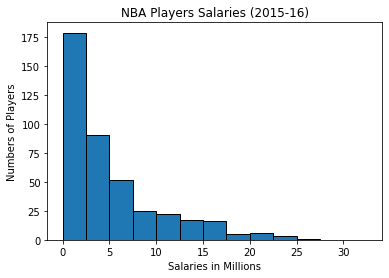

In [ ]:
plt.hist(nba_results_all["salary"], bins = np.arange(0, 35, 2.5), ec='black')
plt.title("NBA Players Salaries (2015-16)")
plt.xlabel("Salaries in Millions")
plt.ylabel("Numbers of Players")


C) What have you learned from this histogram?

*There were a lot of players in 2015 and 2016 making the league minimum or making a little above the league minimum salary.*

---

# QUESTION 2

Based on the histogram above, we will make these salary designations.

* \[0, 5 million) - low
* \[5 million, 10 million) - medium
* \[10 million, 15 million) - high
* At lesat 15 million - super star

Determine how many players in 2015-2016 are in each of the categories above.


Double-click __here__ to see what the solution looks like.

<!--
|   | salary_category | num_players |
|--:|----------------:|------------:|
| 0 | high            | 39          |
| 1 | low             | 270         |
| 2 | medium          | 77          |
| 3 | super star      | 31          |

-->

In [ ]:
sql_statement2 = """
                    SELECT
                      CASE 
                        WHEN salary < 5.0 THEN 'low' 
                        WHEN salary < 10.0 THEN 'medium'
                        WHEN salary < 15.0 THEN 'high'
                        WHEN salary > 15.0 THEN 'super star'
                       END salary_category,
                       COUNT(*) AS num_players
                     FROM nba_15_16
                     GROUP BY salary_category
                   """

query_results2 = pd.read_sql_query(sql_statement2, conn)

query_results2

,salary_category,num_players
0,high,39
1,low,270
2,medium,77
3,super star,31


---

# QUESTION 3


Find how many players were on each team in the 2015-2016 season and also show the average salary of each team.  Order the table from the team with the greatest number of players to the least.  Make the column headers match those below.


|                team | num_players | avg_salary |
|--------------------:|------------:|-----------:|


Double-click __here__ to see what the solution looks like.

<!--
|    | team                   |   num_players |   avg_salary |
|---:|:-----------------------|--------------:|-------------:|
|  0 | Memphis Grizzlies      |            21 |      4.4665  |
|  1 | Charlotte Hornets      |            18 |      4.67236 |
|  2 | Washington Wizards     |            17 |      5.29691 |
|  3 | Utah Jazz              |            17 |      3.09599 |
|  4 | Toronto Raptors        |            17 |      4.39251 |
|  5 | Phoenix Suns           |            17 |      2.97181 |
|  6 | Oklahoma City Thunder  |            16 |      6.05201 |
|  7 | New Orleans Pelicans   |            16 |      5.03216 |
|  8 | Boston Celtics         |            15 |      3.35237 |
|  9 | Portland Trail Blazers |            14 |      3.24621 |
| 10 | Orlando Magic          |            14 |      5.54457 |
| 11 | Golden State Warriors  |            14 |      6.72037 |
| 12 | Denver Nuggets         |            14 |      4.45924 |
| 13 | Atlanta Hawks          |            14 |      4.96951 |
| 14 | San Antonio Spurs      |            13 |      6.5117  |
| 15 | Philadelphia 76ers     |            13 |      3.2678  |
| 16 | New York Knicks        |            13 |      5.33885 |
| 17 | Minnesota Timberwolves |            13 |      5.06519 |
| 18 | Milwaukee Bucks        |            13 |      4.01987 |
| 19 | Los Angeles Clippers   |            13 |      5.08262 |
| 20 | Indiana Pacers         |            13 |      4.82269 |
| 21 | Brooklyn Nets          |            13 |      4.40823 |
| 22 | Miami Heat             |            12 |      6.79406 |
| 23 | Houston Rockets        |            12 |      7.10715 |
| 24 | Chicago Bulls          |            12 |      6.56841 |
| 25 | Sacramento Kings       |            11 |      6.21681 |
| 26 | Los Angeles Lakers     |            11 |      6.23709 |
| 27 | Dallas Mavericks       |            11 |      5.97841 |
| 28 | Detroit Pistons        |            10 |      4.22118 |
| 29 | Cleveland Cavaliers    |            10 |     10.2312  |
-->

In [ ]:
sql_statement3 = """
                    SELECT team, COUNT(*) AS num_players, AVG(salary) AS avg_salary
                    FROM nba_15_16
                    GROUP BY team 
                    ORDER BY num_players DESC;                
                   """

query_results3 = pd.read_sql_query(sql_statement3, conn)

query_results3

,team,num_players,avg_salary
0,Memphis Grizzlies,21,4.466497
1,Charlotte Hornets,18,4.672355
2,Washington Wizards,17,5.296912
3,Utah Jazz,17,3.095993
4,Toronto Raptors,17,4.392507
5,Phoenix Suns,17,2.971813
6,Oklahoma City Thunder,16,6.052010
7,New Orleans Pelicans,16,5.032163
8,Boston Celtics,15,3.352367
9,Portland Trail Blazers,14,3.246206


---

# QUESTION 4



A) For each team 2015-2016, show how many players per position there were and the average salary per position.  The column titles should be shown as follows. Sort the table from the highest average salary to the least.

| position | num_players | avg_salary |
|---------:|------------:|-----------:|


Double-click __here__ to see what the solution looks like.

<!--

|    | position   |   num_players |   avg_salary |
|---:|:-----------|--------------:|-------------:|
|  0 | SG         |            96 |      3.9882  |
|  1 | PF         |            85 |      4.95134 |
|  2 | PG         |            85 |      5.16549 |
|  3 | SF         |            82 |      5.53267 |
|  4 | C          |            69 |      6.08291 |


-->

In [ ]:
sql_statement4 = """
                    SELECT position, COUNT(*) AS num_players, AVG(salary) AS avg_salary
                    FROM nba_15_16
                    GROUP BY position
                    ORDER BY avg_salary ASC
                    
                   """

query_results4 = pd.read_sql_query(sql_statement4, conn)

query_results4

,position,num_players,avg_salary
0,SG,96,3.988195
1,PF,85,4.951344
2,PG,85,5.165487
3,SF,82,5.532675
4,C,69,6.082913


B) Based on your analysis, what position makes the most on avereage?

*Write your answer here.*

---

# QUESTION 5

A) List all teams in 2015-16, where all of the point guards ('PG') on the team made more than 2 million dollars.  Use a GROUP BY.  

Double-click __here__ to see what the solution looks like.

<!--
​

|    | team                   |
|---:|:-----------------------|
|  0 | Chicago Bulls          |
|  1 | Dallas Mavericks       |
|  2 | Denver Nuggets         |
|  3 | Detroit Pistons        |
|  4 | Golden State Warriors  |
|  5 | Houston Rockets        |
|  6 | Los Angeles Lakers     |
|  7 | Oklahoma City Thunder  |
|  8 | Philadelphia 76ers     |
|  9 | Portland Trail Blazers |
| 10 | Sacramento Kings       |
| 11 | Washington Wizards     |


-->

In [ ]:
sql_statement5a = """
                    SELECT team
                    FROM nba_15_16
                    WHERE position = 'PG'
                    GROUP BY team
                    HAVING MIN(salary) > 2.0                    
                   """

query_results5a = pd.read_sql_query(sql_statement5a, conn)

query_results5a

,team
0,Chicago Bulls
1,Dallas Mavericks
2,Denver Nuggets
3,Detroit Pistons
4,Golden State Warriors
5,Houston Rockets
6,Los Angeles Lakers
7,Oklahoma City Thunder
8,Philadelphia 76ers
9,Portland Trail Blazers


B) Answer the same question, but now use a correlated subquery.  

Note that your answer in (A) would be much more efficient on a larger dataset, since correlated subqueries require row-by-row processing.

In [ ]:
sql_statement5b = """
                    SELECT team
                    FROM nba_15_16
                    WHERE position = 'PG' AND
                         (SELECT salary
                          FROM nba_15_16
                          WHERE position = 'PG'
                          GROUP BY team)
                    GROUP BY team
                    HAVING MIN(salary) > 2.0

                   """

query_results5b = pd.read_sql_query(sql_statement5b, conn)

query_results5b

,team
0,Chicago Bulls
1,Dallas Mavericks
2,Denver Nuggets
3,Detroit Pistons
4,Golden State Warriors
5,Houston Rockets
6,Los Angeles Lakers
7,Oklahoma City Thunder
8,Philadelphia 76ers
9,Portland Trail Blazers


---

# Incorporating the 20_21 season

Recall that we have a second table (```nba_20_21```) in our database. 

Below we remind ourselves of what is in this table.

In [ ]:
sql_statement = """SELECT *
                   FROM nba_20_21"""

nba_results = pd.read_sql_query(sql_statement, conn)
nba_results

,jersey,name,pos,height,weight,age,team,yos,predraft_team,draft_status,nationality
0,15,Precious Achiuwa,SF,81,210,21,Miami Heat,0,Memphis,2020 Rnd 1 Pick 20,Nigeria
1,12,Steven Adams,C,84,265,27,New Orleans Pelicans,7,Pittsburgh,2013 Rnd 1 Pick 12,New Zealand
2,13,Bam Adebayo,C,73,255,23,Miami Heat,3,Kentucky,2017 Rnd 1 Pick 14,United States
3,0,Ty-Shon Alexander,SG,76,195,23,Phoenix Suns,0,Creighton,"2020 NBA Draft, Undrafted",United States
4,6,Nickeil Alexander-Walker,SG,77,205,22,New Orleans Pelicans,1,Virginia Tech,2019 Rnd 1 Pick 17,Canada
...,...,...,...,...,...,...,...,...,...,...,...
490,55,Delon Wright,G,77,185,29,Sacramento Kings,5,Utah,2015 Rnd 1 Pick 20,United States
491,21,Thaddeus Young,F,80,235,32,Chicago Bulls,13,Georgia Tech,2007 Rnd 1 Pick 12,United States
492,11,Trae Young,PG,73,180,22,Atlanta Hawks,2,Oklahoma,2018 Rnd 1 Pick 5,United States
493,40,Cody Zeller,F,84,240,28,Charlotte Hornets,7,Indiana,2013 Rnd 1 Pick 4,United States


---

# QUESTION 6

A) Use an ANTI-JOIN to anwer this question.

List all players in the 20-21 season who were not playing in 15-16.

Order them alphabetically.


Double-click __here__ to see what the solution looks like.

<!--

|     | name                     |
|----:|:-------------------------|
|   0 | Aaron Holiday            |
|   1 | Aaron Nesmith            |
|   2 | Abdel Nader              |
|   3 | Adam Mokoka              |
|   4 | Aleksej Pokusevski       |
|   5 | Alen Smailagic           |
|   6 | Alex Caruso              |
|   7 | Alfonzo McKinnie         |
|   8 | Alize Johnson            |
|   9 | Amida Brimah             |
|  10 | Amir Coffey              |
|  11 | Anfernee Simons          |
|  12 | Anthony Edwards          |
|  13 | Anthony Gill             |
|  14 | Anthony Lamb             |
|  15 | Anthony Tolliver         |
|  16 | Armoni Brooks            |
|  17 | Axel Toupane             |
|  18 | Bam Adebayo              |
|  19 | Ben Simmons              |
|  20 | Bogdan Bogdanovic        |
|  21 | Bol Bol                  |
|  22 | Brad Wanamaker           |
|  23 | Brandon Clarke           |
|  24 | Brandon Goodwin          |
|  25 | Brandon Ingram           |
|  26 | Brodric Thomas           |
|  27 | Brook Lopez              |
|  28 | Bruce Brown, Jr.         |
|  29 | Bruno Fernando           |
|  30 | Bryn Forbes              |
|  31 | Buddy Hield              |
|  32 | C.J. Elleby              |
|  33 | Caleb Martin             |
|  34 | Cam Reddish              |
|  35 | Cameron Johnson          |
|  36 | Caris LeVert             |
|  37 | Carsen Edwards           |
|  38 | Cassius Stanley          |
|  39 | Cassius Winston          |
|  40 | Cedi Osman               |
|  41 | Chandler Hutchison       |
|  42 | Chasson Randle           |
|  43 | Chimezie Metu            |
|  44 | Chris Boucher            |
|  45 | Chris Chiozza            |
|  46 | Christian Wood           |
|  47 | Chuma Okeke              |
|  48 | Coby White               |
|  49 | Cody Martin              |
|  50 | Cole Anthony             |
|  51 | Collin Sexton            |
|  52 | Cristiano Felicio        |
|  53 | D.J. Wilson              |
|  54 | DaQuan Jeffries          |
|  55 | Damian Jones             |
|  56 | Damion Lee               |
|  57 | Damyean Dotson           |
|  58 | Daniel Gafford           |
|  59 | Daniel Oturu             |
|  60 | Daniel Theis             |
|  61 | Danuel House             |
|  62 | Dario Saric              |
|  63 | Darius Bazley            |
|  64 | Darius Garland           |
|  65 | David Nwaba              |
|  66 | Davis Bertans            |
|  67 | De'Aaron Fox             |
|  68 | De'Andre Hunter          |
|  69 | De'Anthony Melton        |
|  70 | DeAndre Jordan           |
|  71 | DeAndre' Bembry          |
|  72 | Dean Wade                |
|  73 | Deandre Ayton            |
|  74 | Deividas Sirvydis        |
|  75 | Dejounte Murray          |
|  76 | Deni Avdija              |
|  77 | Dennis Smith             |
|  78 | Denzel Valentine         |
|  79 | Derrick Favors           |
|  80 | Derrick Jones            |
|  81 | Derrick White            |
|  82 | Desmond Bane             |
|  83 | Devin Vassell            |
|  84 | Devon Dotson             |
|  85 | Devontae Cacok           |
|  86 | Devonte' Graham          |
|  87 | Dewayne Dedmon           |
|  88 | Didi Louzada             |
|  89 | Dillon Brooks            |
|  90 | Domantas Sabonis         |
|  91 | Donovan Mitchell         |
|  92 | Donte DiVincenzo         |
|  93 | Dorian Finney-Smith      |
|  94 | Drew Eubanks             |
|  95 | Duncan Robinson          |
|  96 | Dwayne Bacon             |
|  97 | Dwight Powell            |
|  98 | Dylan Windler            |
|  99 | Edmond Sumner            |
| 100 | Elijah Hughes            |
| 101 | Eric Paschall            |
| 102 | Facundo Campazzo         |
| 103 | Frank Jackson            |
| 104 | Frank Kaminsky           |
| 105 | Frank Ntilikina          |
| 106 | Fred VanVleet            |
| 107 | Freddie Gillespie        |
| 108 | Furkan Korkmaz           |
| 109 | Gabe Vincent             |
| 110 | Gabriel Deck             |
| 111 | Garrison Mathews         |
| 112 | Gary Trent, Jr.          |
| 113 | George Hill              |
| 114 | Georges Niang            |
| 115 | Goga Bitadze             |
| 116 | Grant Riller             |
| 117 | Grant Williams           |
| 118 | Grayson Allen            |
| 119 | Hamidou Diallo           |
| 120 | Harry Giles              |
| 121 | Hassan Whiteside         |
| 122 | Immanuel Quickley        |
| 123 | Isaac Bonga              |
| 124 | Isaac Okoro              |
| 125 | Isaiah Hartenstein       |
| 126 | Isaiah Joe               |
| 127 | Isaiah Roby              |
| 128 | Isaiah Stewart II        |
| 129 | Ish Smith                |
| 130 | Ivica Zubac              |
| 131 | Ja Morant                |
| 132 | Jaden McDaniels          |
| 133 | Jae'sean Tate            |
| 134 | Jahmi'us Ramsey          |
| 135 | Jake Layman              |
| 136 | Jakob Poeltl             |
| 137 | Jalen Brunson            |
| 138 | Jalen Harris             |
| 139 | Jalen McDaniels          |
| 140 | Jalen Smith              |
| 141 | Jamal Murray             |
| 142 | James Nunnally           |
| 143 | James Wiseman            |
| 144 | Jared Harper             |
| 145 | Jaren Jackson, Jr.       |
| 146 | Jarred Vanderbilt        |
| 147 | Jarrell Brantley         |
| 148 | Jarrett Allen            |
| 149 | Jarrett Culver           |
| 150 | Javonte Green            |
| 151 | Jaxson Hayes             |
| 152 | Jayden Scrubb            |
| 153 | Jaylen Brown             |
| 154 | Jaylen Hoard             |
| 155 | Jaylen Nowell            |
| 156 | Jayson Tatum             |
| 157 | Jeremiah Martin          |
| 158 | Jevon Carter             |
| 159 | Joe Harris               |
| 160 | John Collins             |
| 161 | John Konchar             |
| 162 | Jonathan Isaac           |
| 163 | Jontay Porter            |
| 164 | Jordan Clarkson          |
| 165 | Jordan McLaughlin        |
| 166 | Jordan Nwora             |
| 167 | Jordan Poole             |
| 168 | Josh Green               |
| 169 | Josh Hall                |
| 170 | Josh Hart                |
| 171 | Josh Jackson             |
| 172 | Josh Okogie              |
| 173 | Juan Toscano-Anderson    |
| 174 | Juancho Hernangomez      |
| 175 | Justin Holiday           |
| 176 | Justin Jackson           |
| 177 | Justin James             |
| 178 | Juwan Morgan             |
| 179 | K.J. Martin              |
| 180 | KZ Okpala                |
| 181 | Keita Bates-Diop         |
| 182 | Kelan Martin             |
| 183 | Keldon Johnson           |
| 184 | Keljin Blevins           |
| 185 | Kelly Oubre, Jr.         |
| 186 | Kendrick Nunn            |
| 187 | Kenrich Williams         |
| 188 | Kevin Huerter            |
| 189 | Kevin Knox               |
| 190 | Kevin Porter, Jr.        |
| 191 | Khem Birch               |
| 192 | Killian Hayes            |
| 193 | Killian Tillie           |
| 194 | Kira Lewis, Jr.          |
| 195 | Kostas Antetokounmpo     |
| 196 | Kris Dunn                |
| 197 | Kyle Guy                 |
| 198 | Kyle Kuzma               |
| 199 | LaMelo Ball              |
| 200 | Lamar Stevens            |
| 201 | Landry Shamet            |
| 202 | Larry Nance, Jr.         |
| 203 | Lauri Markkanen          |
| 204 | Lonnie Walker            |
| 205 | Lonzo Ball               |
| 206 | Lou Williams             |
| 207 | Louis King               |
| 208 | Luguentz Dort            |
| 209 | Luka Doncic              |
| 210 | Luka Samanic             |
| 211 | Luke Kennard             |
| 212 | Luke Kornet              |
| 213 | Malachi Flynn            |
| 214 | Malcolm Brogdon          |
| 215 | Malik Beasley            |
| 216 | Malik Monk               |
| 217 | Mamadi Diakite           |
| 218 | Marcus Morris            |
| 219 | Markelle Fultz           |
| 220 | Markus Howard            |
| 221 | Marvin Bagley III        |
| 222 | Mason Jones              |
| 223 | Matisse Thybulle         |
| 224 | Matt Dellavedova         |
| 225 | Matt Thomas              |
| 226 | Max Strus                |
| 227 | Maxi Kleber              |
| 228 | Mfiondu Kabengele        |
| 229 | Michael Porter, Jr.      |
| 230 | Mikal Bridges            |
| 231 | Mike Muscala             |
| 232 | Miles Bridges            |
| 233 | Mitchell Robinson        |
| 234 | Miye Oni                 |
| 235 | Moe Wagner               |
| 236 | Mohamed Bamba            |
| 237 | Monte Morris             |
| 238 | Moses Brown              |
| 239 | Mychal Mulder            |
| 240 | Naji Marshall            |
| 241 | Nassir Little            |
| 242 | Nate Darling             |
| 243 | Nate Hinton              |
| 244 | Nathan Knight            |
| 245 | Naz Reid                 |
| 246 | Nick Richards            |
| 247 | Nickeil Alexander-Walker |
| 248 | Nico Mannion             |
| 249 | Nicolas Claxton          |
| 250 | Nicolo Melli             |
| 251 | Norvel Pelle             |
| 252 | OShae Brissett           |
| 253 | Obi Toppin               |
| 254 | Ogugua Anunoby           |
| 255 | Onyeka Okongwu           |
| 256 | Otto Porter              |
| 257 | P.J. Dozier              |
| 258 | P.J. Washington          |
| 259 | Pascal Siakam            |
| 260 | Patrick Williams         |
| 261 | Paul Reed, Jr.           |
| 262 | Paul Watson              |
| 263 | Payton Pritchard         |
| 264 | Precious Achiuwa         |
| 265 | Quinndary Weatherspoon   |
| 266 | R.J. Barrett             |
| 267 | R.J. Hampton             |
| 268 | Raulzinho Neto           |
| 269 | Rayjon Tucker            |
| 270 | Reggie Perry             |
| 271 | Robert Williams          |
| 272 | Robert Woodard II        |
| 273 | Rodions Kurucs           |
| 274 | Rodney McGruder          |
| 275 | Romeo Langford           |
| 276 | Royce O'Neale            |
| 277 | Rui Hachimura            |
| 278 | Ryan Arcidiacono         |
| 279 | Saben Lee                |
| 280 | Saddiq Bey               |
| 281 | Sam Merrill              |
| 282 | Sean McDermott           |
| 283 | Sekou Doumbouya          |
| 284 | Semi Ojeleye             |
| 285 | Seth Curry               |
| 286 | Shai Gilgeous-Alexander  |
| 287 | Shake Milton             |
| 288 | Shaquille Harrison       |
| 289 | Sindarius Thornwell      |
| 290 | Skylar Mays              |
| 291 | Spencer Dinwiddie        |
| 292 | Sterling Brown           |
| 293 | Svi Mykhailiuk           |
| 294 | T.J. Leaf                |
| 295 | T.J. McConnell           |
| 296 | Tacko Fall               |
| 297 | Taj Gibson               |
| 298 | Talen Horton-Tucker      |
| 299 | Taurean Prince           |
| 300 | Terance Mann             |
| 301 | Terence Davis            |
| 302 | Theo Maledon             |
| 303 | Theo Pinson              |
| 304 | Thomas Bryant            |
| 305 | Tim Frazier              |
| 306 | Timothe Luwawu-Cabarrot  |
| 307 | Tomas Satoransky         |
| 308 | Tony Bradley             |
| 309 | Torrey Craig             |
| 310 | Trae Young               |
| 311 | Tre Jones                |
| 312 | Tremont Waters           |
| 313 | Trent Forrest            |
| 314 | Troy Brown, Jr.          |
| 315 | Ty Jerome                |
| 316 | Ty-Shon Alexander        |
| 317 | Tyler Bey                |
| 318 | Tyler Cook               |
| 319 | Tyler Herro              |
| 320 | Tyrell Terry             |
| 321 | Tyrese Haliburton        |
| 322 | Tyrese Maxey             |
| 323 | Udoka Azubuike           |
| 324 | Vernon Carey, Jr.        |
| 325 | Vlatko Cancar            |
| 326 | Wendell Carter, Jr.      |
| 327 | Wenyen Gabriel           |
| 328 | Wesley Iwundu            |
| 329 | Wesley Matthews          |
| 330 | Willy Hernangomez        |
| 331 | Xavier Tillman, Sr.      |
| 332 | Yogi Ferrell             |
| 333 | Yuta Watanabe            |
| 334 | Zach Collins             |
| 335 | Zeke Nnaji               |
| 336 | Zion Williamson          |




-->

In [ ]:
sql_statement6a = """
                    SELECT name
                    FROM nba_20_21
                    WHERE name NOT IN (SELECT player
                                       FROM nba_15_16)
                    ORDER BY name ASC
                   """

query_results6a = pd.read_sql_query(sql_statement6a, conn)

query_results6a

,name
0,Aaron Holiday
1,Aaron Nesmith
2,Abdel Nader
3,Adam Mokoka
4,Aleksej Pokusevski
...,...
332,Yogi Ferrell
333,Yuta Watanabe
334,Zach Collins
335,Zeke Nnaji


B) Answer the same question above but with a JOIN, LEFT JOIN, RIGHT JOIN, or FULL JOIN.

You must decide which is appropriate for this question.

In [ ]:
sql_statement6b = """
                    SELECT name
                    FROM nba_20_21
                      LEFT JOIN nba_15_16
                        ON name=player 
                    WHERE player IS NULL
                    ORDER BY name ASC
                    

                  """
query_results6b = pd.read_sql_query(sql_statement6b, conn)

query_results6b

,name
0,Aaron Holiday
1,Aaron Nesmith
2,Abdel Nader
3,Adam Mokoka
4,Aleksej Pokusevski
...,...
332,Yogi Ferrell
333,Yuta Watanabe
334,Zach Collins
335,Zeke Nnaji


C)  Answer the same question via an set theory command (UNION, UNION ALL, INTERSECT, EXCEPT).

In [ ]:
sql_statement6c = """
                    SELECT name
                    FROM nba_20_21

                    EXCEPT
                    
                    SELECT player
                    FROM nba_15_16

                   """

query_results6c = pd.read_sql_query(sql_statement6c, conn)

query_results6c

,name
0,Aaron Holiday
1,Aaron Nesmith
2,Abdel Nader
3,Adam Mokoka
4,Aleksej Pokusevski
...,...
332,Yogi Ferrell
333,Yuta Watanabe
334,Zach Collins
335,Zeke Nnaji


---

# QUESTION 7

A)  Using a JOIN, LEFT JOIN, RIGHT JOIN, or FULL JOIN, now list all players in the 15-16 season who were not playing in 20-21.

Order them alphabetically.

Double-click __here__ to see what the solution looks like.

<!--
|     | player                 |
|----:|:-----------------------|
|   0 | Aaron Brooks           |
|   1 | Aaron Harrison         |
|   2 | Adreian Payne          |
|   3 | Al Jefferson           |
|   4 | Alan Anderson          |
|   5 | Alexis Ajinca          |
|   6 | Allen Crabbe           |
|   7 | Alonzo Gee             |
|   8 | Anderson Varejao       |
|   9 | Andre Roberson         |
|  10 | Andrea Bargnani        |
|  11 | Andrew Bogut           |
|  12 | Andrew Nicholson       |
|  13 | Anthony Brown          |
|  14 | Anthony Morrow         |
|  15 | Archie Goodwin         |
|  16 | Arron Afflalo          |
|  17 | Beno Udrih             |
|  18 | Bo McCalebb            |
|  19 | Boris Diaw             |
|  20 | Brandan Wright         |
|  21 | Brandon Bass           |
|  22 | Brandon Jennings       |
|  23 | Brandon Rush           |
|  24 | Brendan Haywood        |
|  25 | Brian Roberts          |
|  26 | Bruno Caboclo          |
|  27 | Bryce Cotton           |
|  28 | Bryce Dejean-Jones     |
|  29 | C.J. Miles             |
|  30 | C.J. Wilcox            |
|  31 | Carl Landry            |
|  32 | Caron Butler           |
|  33 | Chandler Parsons       |
|  34 | Channing Frye          |
|  35 | Chase Budinger         |
|  36 | Chris Andersen         |
|  37 | Chris Bosh             |
|  38 | Chris Copeland         |
|  39 | Chris Johnson          |
|  40 | Chris Kaman            |
|  41 | Chris McCullough       |
|  42 | Cliff Alexander        |
|  43 | Cole Aldrich           |
|  44 | Corey Brewer           |
|  45 | Corey Hawkins          |
|  46 | Cory Jefferson         |
|  47 | Courtney Lee           |
|  48 | Damien Inglis          |
|  49 | Damien Wilkins         |
|  50 | Damjan Rudez           |
|  51 | Danny Granger          |
|  52 | Dante Cunningham       |
|  53 | Darrell Arthur         |
|  54 | Darren Collison        |
|  55 | Darrun Hilliard        |
|  56 | David Lee              |
|  57 | David West             |
|  58 | DeJuan Blair           |
|  59 | DeMarre Carroll        |
|  60 | Deron Williams         |
|  61 | Derrick Williams       |
|  62 | Devin Harris           |
|  63 | Dion Waiters           |
|  64 | Dirk Nowitzki          |
|  65 | Donatas Motiejunas     |
|  66 | Drew Gooden            |
|  67 | Dwyane Wade            |
|  68 | Earl Clark             |
|  69 | Elliot Williams        |
|  70 | Emmanuel Mudiay        |
|  71 | Erick Green            |
|  72 | Evan Turner            |
|  73 | Festus Ezeli           |
|  74 | Frank Kaminsky III     |
|  75 | Furkan Aldemir         |
|  76 | Gary Neal              |
|  77 | Gerald Henderson       |
|  78 | Gerald Wallace         |
|  79 | Glenn Robinson III     |
|  80 | Grant Jerrett          |
|  81 | Greg Whittington       |
|  82 | Greivis Vasquez        |
|  83 | Henry Walker           |
|  84 | Ian Mahinmi            |
|  85 | Iman Shumpert          |
|  86 | Isaiah Thomas          |
|  87 | J.J. Barea             |
|  88 | JJ Hickson             |
|  89 | Jamal Crawford         |
|  90 | Jameer Nelson          |
|  91 | James Anderson         |
|  92 | James Young            |
|  93 | Jared Sullinger        |
|  94 | Jarell Eddie           |
|  95 | Jarell Martin          |
|  96 | Jarnell Stokes         |
|  97 | Jarrett Jack           |
|  98 | Jarrid Famous          |
|  99 | Jason Richardson       |
| 100 | Jason Smith            |
| 101 | Jason Thompson         |
| 102 | Jeff Ayres             |
| 103 | Jeff Withey            |
| 104 | Jerel McNeal           |
| 105 | Jeremy Lin             |
| 106 | Jerian Grant           |
| 107 | Jerryd Bayless         |
| 108 | Jimmer Fredette        |
| 109 | Joakim Noah            |
| 110 | Jodie Meeks            |
| 111 | Joe Johnson            |
| 112 | Joe Young              |
| 113 | Joel Anthony           |
| 114 | Joffrey Lauvergne      |
| 115 | John Henson            |
| 116 | John Jenkins           |
| 117 | Jon Leuer              |
| 118 | Jonas Jerebko          |
| 119 | Jordan Adams           |
| 120 | Jordan Hamilton        |
| 121 | Jordan Hill            |
| 122 | Jordan McRae           |
| 123 | Jordan Mickey          |
| 124 | Jorge Gutierrez        |
| 125 | Jose Calderon          |
| 126 | Josh Huestis           |
| 127 | Josh McRoberts         |
| 128 | Justin Anderson        |
| 129 | K.J. McDaniels         |
| 130 | Keith Appling          |
| 131 | Kelly Oubre Jr.        |
| 132 | Kendall Marshall       |
| 133 | Kendrick Perkins       |
| 134 | Kenneth Faried         |
| 135 | Kevin Garnett          |
| 136 | Kevin Martin           |
| 137 | Kirk Hinrich           |
| 138 | Kobe Bryant            |
| 139 | Kosta Koufos           |
| 140 | Kostas Papanikolaou    |
| 141 | Kris Humphries         |
| 142 | Kyle Korver            |
| 143 | Kyle O'Quinn           |
| 144 | Kyle Singler           |
| 145 | LaMarcus Aldridge      |
| 146 | Lamar Patterson        |
| 147 | Lance Stephenson       |
| 148 | Lance Thomas           |
| 149 | Larry Nance Jr.        |
| 150 | Lavoy Allen            |
| 151 | Leandro Barbosa        |
| 152 | Lester Hudson          |
| 153 | Lorenzo Brown          |
| 154 | Lou Amundson           |
| 155 | Louis Williams         |
| 156 | Lucas Nogueira         |
| 157 | Luis Montero           |
| 158 | Luis Scola             |
| 159 | Luke Babbitt           |
| 160 | Luke Ridnour           |
| 161 | Luol Deng              |
| 162 | Manu Ginobili          |
| 163 | Marcin Gortat          |
| 164 | Marco Belinelli        |
| 165 | Mario Chalmers         |
| 166 | Mario Hezonja          |
| 167 | Markel Brown           |
| 168 | Marreese Speights      |
| 169 | Martell Webster        |
| 170 | Marvin Williams        |
| 171 | Matt Barnes            |
| 172 | Matthew Dellavedova    |
| 173 | Meyers Leonard         |
| 174 | Michael Kidd-Gilchrist |
| 175 | Mike Dunleavy          |
| 176 | Miles Plumlee          |
| 177 | Mirza Teletovic        |
| 178 | Mitch McGary           |
| 179 | Mo Williams            |
| 180 | Monta Ellis            |
| 181 | Nene Hilario           |
| 182 | Nick Collison          |
| 183 | Nick Young             |
| 184 | Nik Stauskas           |
| 185 | Nikola Mirotic         |
| 186 | Nikola Pekovic         |
| 187 | Noah Vonleh            |
| 188 | Norris Cole            |
| 189 | O.J. Mayo              |
| 190 | Omer Asik              |
| 191 | Omri Casspi            |
| 192 | Orlando Johnson        |
| 193 | Otto Porter Jr.        |
| 194 | P.J. Hairston          |
| 195 | Pablo Prigioni         |
| 196 | Pau Gasol              |
| 197 | Paul Pierce            |
| 198 | Perry Jones            |
| 199 | Phil Pressey           |
| 200 | Quincy Pondexter       |
| 201 | R.J. Hunter            |
| 202 | Rakeem Christmas       |
| 203 | Ramon Sessions         |
| 204 | Randy Foye             |
| 205 | Rashad Vaughn          |
| 206 | Raul Neto              |
| 207 | Ray McCallum           |
| 208 | Raymond Felton         |
| 209 | Reggie Williams        |
| 210 | Robert Sacre           |
| 211 | Rodney Stuckey         |
| 212 | Ronald Roberts Jr.     |
| 213 | Roy Hibbert            |
| 214 | Russ Smith             |
| 215 | Ryan Anderson          |
| 216 | Ryan Hollins           |
| 217 | Ryan Kelly             |
| 218 | Sam Dekker             |
| 219 | Sasha Kaun             |
| 220 | Sean Kilpatrick        |
| 221 | Sergey Karasev         |
| 222 | Shabazz Muhammad       |
| 223 | Shabazz Napier         |
| 224 | Shane Larkin           |
| 225 | Shannon Scott          |
| 226 | Shaun Livingston       |
| 227 | Shelvin Mack           |
| 228 | Spencer Hawes          |
| 229 | Steve Novak            |
| 230 | Terran Petteway        |
| 231 | Terrence Jones         |
| 232 | Terrico White          |
| 233 | Thabo Sefolosha        |
| 234 | Thomas Robinson        |
| 235 | Tiago Splitter         |
| 236 | Tibor Pleiss           |
| 237 | Tim Duncan             |
| 238 | Timofey Mozgov         |
| 239 | Toney Douglas          |
| 240 | Tony Allen             |
| 241 | Tony Parker            |
| 242 | Tony Wroten            |
| 243 | Treveon Graham         |
| 244 | Trevor Booker          |
| 245 | Troy Daniels           |
| 246 | Ty Lawson              |
| 247 | Tyler Ennis            |
| 248 | Tyler Hansbrough       |
| 249 | Tyler Zeller           |
| 250 | Tyreke Evans           |
| 251 | Tyson Chandler         |
| 252 | Vince Carter           |
| 253 | Walter Tavares         |
| 254 | Wesley Johnson         |
| 255 | Wilson Chandler        |
| 256 | Zach Randolph          |
| 257 | Zaza Pachulia          |
| 258 | Zoran Dragic           |



-->

In [ ]:
sql_statement7 = """
                    SELECT player
                    FROM nba_15_16
                      LEFT JOIN nba_20_21
                        ON player=name
                    WHERE name IS NULL
                    ORDER BY player ASC
                    
                 """

query_results7 = pd.read_sql_query(sql_statement7, conn)

query_results7

,player
0,Aaron Brooks
1,Aaron Harrison
2,Adreian Payne
3,Al Jefferson
4,Alan Anderson
...,...
254,Wesley Johnson
255,Wilson Chandler
256,Zach Randolph
257,Zaza Pachulia


---

# QUESTION 8

List all players who were a point guard in at least one of the 2015-16 or 2020-21 seasons.  Order them in alphabetical order.

Double-click __here__ to see what the solution looks like.

<!--

|     | name                    |
|----:|:------------------------|
|   0 | Aaron Brooks            |
|   1 | Aaron Holiday           |
|   2 | Austin Rivers           |
|   3 | Avery Bradley           |
|   4 | Beno Udrih              |
|   5 | Bo McCalebb             |
|   6 | Brandon Goodwin         |
|   7 | Brandon Jennings        |
|   8 | Brian Roberts           |
|   9 | Bryce Cotton            |
|  10 | Cameron Payne           |
|  11 | Carsen Edwards          |
|  12 | Cassius Winston         |
|  13 | Chasson Randle          |
|  14 | Chris Chiozza           |
|  15 | Chris Paul              |
|  16 | Coby White              |
|  17 | Cole Anthony            |
|  18 | Collin Sexton           |
|  19 | Corey Hawkins           |
|  20 | Cory Joseph             |
|  21 | D'Angelo Russell        |
|  22 | D.J. Augustin           |
|  23 | Damian Lillard          |
|  24 | Dante Exum              |
|  25 | Darren Collison         |
|  26 | De'Aaron Fox            |
|  27 | Delon Wright            |
|  28 | Dennis Schroder         |
|  29 | Dennis Smith            |
|  30 | Deron Williams          |
|  31 | Derrick Rose            |
|  32 | Devin Harris            |
|  33 | Devon Dotson            |
|  34 | Devonte' Graham         |
|  35 | Elfrid Payton           |
|  36 | Emmanuel Mudiay         |
|  37 | Eric Bledsoe            |
|  38 | Erick Green             |
|  39 | Facundo Campazzo        |
|  40 | Frank Ntilikina         |
|  41 | Gary Neal               |
|  42 | Goran Dragic            |
|  43 | Greivis Vasquez         |
|  44 | Immanuel Quickley       |
|  45 | Isaiah Thomas           |
|  46 | Ish Smith               |
|  47 | J.J. Barea              |
|  48 | Jahmi'us Ramsey         |
|  49 | Jalen Brunson           |
|  50 | Jameer Nelson           |
|  51 | Jared Harper            |
|  52 | Jarrett Jack            |
|  53 | Jeff Teague             |
|  54 | Jeremiah Martin         |
|  55 | Jeremy Lin              |
|  56 | Jerian Grant            |
|  57 | Jerryd Bayless          |
|  58 | Jevon Carter            |
|  59 | Jimmer Fredette         |
|  60 | Joe Young               |
|  61 | John Wall               |
|  62 | Jorge Gutierrez         |
|  63 | Jose Calderon           |
|  64 | Jrue Holiday            |
|  65 | Keith Appling           |
|  66 | Kemba Walker            |
|  67 | Kendall Marshall        |
|  68 | Kira Lewis, Jr.         |
|  69 | Kyle Lowry              |
|  70 | Kyrie Irving            |
|  71 | Landry Shamet           |
|  72 | Lonzo Ball              |
|  73 | Lorenzo Brown           |
|  74 | Luguentz Dort           |
|  75 | Luke Ridnour            |
|  76 | Malachi Flynn           |
|  77 | Marcus Smart            |
|  78 | Mario Chalmers          |
|  79 | Markelle Fultz          |
|  80 | Matthew Dellavedova     |
|  81 | Michael Carter-Williams |
|  82 | Mike Conley             |
|  83 | Mo Williams             |
|  84 | Nico Mannion            |
|  85 | Norris Cole             |
|  86 | P.J. Dozier             |
|  87 | Pablo Prigioni          |
|  88 | Patrick Beverley        |
|  89 | Patty Mills             |
|  90 | Payton Pritchard        |
|  91 | Phil Pressey            |
|  92 | Rajon Rondo             |
|  93 | Ramon Sessions          |
|  94 | Raul Neto               |
|  95 | Raulzinho Neto          |
|  96 | Ray McCallum            |
|  97 | Raymond Felton          |
|  98 | Reggie Jackson          |
|  99 | Ricky Rubio             |
| 100 | Rodney Stuckey          |
| 101 | Russ Smith              |
| 102 | Russell Westbrook       |
| 103 | Saben Lee               |
| 104 | Shabazz Napier          |
| 105 | Shai Gilgeous-Alexander |
| 106 | Shane Larkin            |
| 107 | Shannon Scott           |
| 108 | Shaun Livingston        |
| 109 | Shelvin Mack            |
| 110 | Skylar Mays             |
| 111 | Spencer Dinwiddie       |
| 112 | Stephen Curry           |
| 113 | Terry Rozier            |
| 114 | Theo Maledon            |
| 115 | Tomas Satoransky        |
| 116 | Toney Douglas           |
| 117 | Tony Parker             |
| 118 | Trae Young              |
| 119 | Tre Jones               |
| 120 | Tremont Waters          |
| 121 | Trey Burke              |
| 122 | Ty Jerome               |
| 123 | Ty Lawson               |
| 124 | Tyler Ennis             |
| 125 | Tyrell Terry            |
| 126 | Tyrese Haliburton       |
| 127 | Tyrese Maxey            |
| 128 | Tyus Jones              |
| 129 | Zach LaVine             |

-->

Double-click __here__ to see a hint.

<!-- Use a set theory operation -->

In [ ]:
sql_statement8 = """
                    SELECT player
                    FROM nba_15_16
                    WHERE position ='PG'
                    
                    UNION

                    SELECT name
                    FROM nba_20_21
                    WHERE pos = 'PG'
                    
                    ORDER BY player ASC
                    
                    
                   """

query_results8 = pd.read_sql_query(sql_statement8, conn)

query_results8

,player
0,Aaron Brooks
1,Aaron Holiday
2,Austin Rivers
3,Avery Bradley
4,Beno Udrih
...,...
125,Tyrell Terry
126,Tyrese Haliburton
127,Tyrese Maxey
128,Tyus Jones


---

# QUESTION 9

**Use a LEFT/RIGHT/INNER/FULL JOIN** to do the following: 

List all players from 15-16  who are still playing in 20-21 but for a different team.

Show the player's name, 2015-16 team, and 2021-22 team.

Order the players alphabetically.


Double-click __here__ to see what the solution looks like.

<!--

|     | player                   | team_15_16             | team_20_21             |
|----:|:-------------------------|:-----------------------|:-----------------------|
|   0 | Aaron Gordon             | Orlando Magic          | Denver Nuggets         |
|   1 | Al Horford               | Atlanta Hawks          | Oklahoma City Thunder  |
|   2 | Al-Farouq Aminu          | Portland Trail Blazers | Chicago Bulls          |
|   3 | Alec Burks               | Utah Jazz              | New York Knicks        |
|   4 | Alex Len                 | Phoenix Suns           | Washington Wizards     |
|   5 | Andre Drummond           | Detroit Pistons        | Los Angeles Lakers     |
|   6 | Andre Iguodala           | Golden State Warriors  | Miami Heat             |
|   7 | Andrew Wiggins           | Minnesota Timberwolves | Golden State Warriors  |
|   8 | Anthony Davis            | New Orleans Pelicans   | Los Angeles Lakers     |
|   9 | Aron Baynes              | Detroit Pistons        | Toronto Raptors        |
|  10 | Austin Rivers            | Los Angeles Clippers   | Denver Nuggets         |
|  11 | Avery Bradley            | Boston Celtics         | Houston Rockets        |
|  12 | Ben McLemore             | Sacramento Kings       | Los Angeles Lakers     |
|  13 | Bismack Biyombo          | Toronto Raptors        | Charlotte Hornets      |
|  14 | Blake Griffin            | Los Angeles Clippers   | Brooklyn Nets          |
|  15 | Boban Marjanovic         | San Antonio Spurs      | Dallas Mavericks       |
|  16 | Bobby Portis             | Chicago Bulls          | Milwaukee Bucks        |
|  17 | Bojan Bogdanovic         | Brooklyn Nets          | Utah Jazz              |
|  18 | Cameron Payne            | Oklahoma City Thunder  | Phoenix Suns           |
|  19 | Carmelo Anthony          | New York Knicks        | Portland Trail Blazers |
|  20 | Chris Paul               | Los Angeles Clippers   | Phoenix Suns           |
|  21 | Clint Capela             | Houston Rockets        | Atlanta Hawks          |
|  22 | Cory Joseph              | Toronto Raptors        | Detroit Pistons        |
|  23 | D'Angelo Russell         | Los Angeles Lakers     | Minnesota Timberwolves |
|  24 | D.J. Augustin            | Oklahoma City Thunder  | Houston Rockets        |
|  25 | Danilo Gallinari         | Denver Nuggets         | Atlanta Hawks          |
|  26 | Danny Green              | San Antonio Spurs      | Philadelphia Sixers    |
|  27 | Dante Exum               | Utah Jazz              | Houston Rockets        |
|  28 | DeMar DeRozan            | Toronto Raptors        | San Antonio Spurs      |
|  29 | DeMarcus Cousins         | Sacramento Kings       | Los Angeles Clippers   |
|  30 | Delon Wright             | Toronto Raptors        | Sacramento Kings       |
|  31 | Dennis Schroder          | Atlanta Hawks          | Los Angeles Lakers     |
|  32 | Derrick Rose             | Chicago Bulls          | New York Knicks        |
|  33 | Doug McDermott           | Chicago Bulls          | Indiana Pacers         |
|  34 | Dwight Howard            | Houston Rockets        | Philadelphia Sixers    |
|  35 | E'Twaun Moore            | Chicago Bulls          | Phoenix Suns           |
|  36 | Ed Davis                 | Portland Trail Blazers | Minnesota Timberwolves |
|  37 | Elfrid Payton            | Orlando Magic          | New York Knicks        |
|  38 | Enes Kanter              | Oklahoma City Thunder  | Portland Trail Blazers |
|  39 | Eric Bledsoe             | Phoenix Suns           | New Orleans Pelicans   |
|  40 | Eric Gordon              | New Orleans Pelicans   | Houston Rockets        |
|  41 | Ersan Ilyasova           | Orlando Magic          | Utah Jazz              |
|  42 | Evan Fournier            | Orlando Magic          | Boston Celtics         |
|  43 | Garrett Temple           | Washington Wizards     | Chicago Bulls          |
|  44 | Gary Harris              | Denver Nuggets         | Orlando Magic          |
|  45 | Gordon Hayward           | Utah Jazz              | Charlotte Hornets      |
|  46 | Gorgui Dieng             | Minnesota Timberwolves | San Antonio Spurs      |
|  47 | Harrison Barnes          | Golden State Warriors  | Sacramento Kings       |
|  48 | J.J. Redick              | Los Angeles Clippers   | Dallas Mavericks       |
|  49 | JaKarr Sampson           | Philadelphia 76ers     | Indiana Pacers         |
|  50 | JaMychal Green           | Memphis Grizzlies      | Denver Nuggets         |
|  51 | JaVale McGee             | Dallas Mavericks       | Denver Nuggets         |
|  52 | Jabari Parker            | Milwaukee Bucks        | Boston Celtics         |
|  53 | Jae Crowder              | Boston Celtics         | Phoenix Suns           |
|  54 | Jahlil Okafor            | Philadelphia 76ers     | Detroit Pistons        |
|  55 | James Ennis              | Memphis Grizzlies      | Orlando Magic          |
|  56 | James Harden             | Houston Rockets        | Brooklyn Nets          |
|  57 | James Johnson            | Toronto Raptors        | New Orleans Pelicans   |
|  58 | Jared Dudley             | Washington Wizards     | Los Angeles Lakers     |
|  59 | Jeff Green               | Memphis Grizzlies      | Brooklyn Nets          |
|  60 | Jeff Teague              | Atlanta Hawks          | Milwaukee Bucks        |
|  61 | Jerami Grant             | Philadelphia 76ers     | Detroit Pistons        |
|  62 | Jeremy Lamb              | Charlotte Hornets      | Indiana Pacers         |
|  63 | Jimmy Butler             | Chicago Bulls          | Miami Heat             |
|  64 | Joel Embiid              | Philadelphia 76ers     | Philadelphia Sixers    |
|  65 | John Wall                | Washington Wizards     | Houston Rockets        |
|  66 | Jonas Valanciunas        | Toronto Raptors        | Memphis Grizzlies      |
|  67 | Josh Richardson          | Miami Heat             | Dallas Mavericks       |
|  68 | Jrue Holiday             | New Orleans Pelicans   | Milwaukee Bucks        |
|  69 | Julius Randle            | Los Angeles Lakers     | New York Knicks        |
|  70 | Justise Winslow          | Miami Heat             | Memphis Grizzlies      |
|  71 | Jusuf Nurkic             | Denver Nuggets         | Portland Trail Blazers |
|  72 | Kawhi Leonard            | San Antonio Spurs      | Los Angeles Clippers   |
|  73 | Kelly Olynyk             | Boston Celtics         | Houston Rockets        |
|  74 | Kemba Walker             | Charlotte Hornets      | Boston Celtics         |
|  75 | Kent Bazemore            | Atlanta Hawks          | Golden State Warriors  |
|  76 | Kentavious Caldwell-Pope | Detroit Pistons        | Los Angeles Lakers     |
|  77 | Kevin Durant             | Oklahoma City Thunder  | Brooklyn Nets          |
|  78 | Kristaps Porzingis       | New York Knicks        | Dallas Mavericks       |
|  79 | Kyle Anderson            | San Antonio Spurs      | Memphis Grizzlies      |
|  80 | Kyrie Irving             | Cleveland Cavaliers    | Brooklyn Nets          |
|  81 | Langston Galloway        | New York Knicks        | Phoenix Suns           |
|  82 | LeBron James             | Cleveland Cavaliers    | Los Angeles Lakers     |
|  83 | Marc Gasol               | Memphis Grizzlies      | Los Angeles Lakers     |
|  84 | Markieff Morris          | Washington Wizards     | Los Angeles Lakers     |
|  85 | Mason Plumlee            | Portland Trail Blazers | Detroit Pistons        |
|  86 | Maurice Harkless         | Portland Trail Blazers | Sacramento Kings       |
|  87 | Michael Carter-Williams  | Milwaukee Bucks        | Orlando Magic          |
|  88 | Mike Conley              | Memphis Grizzlies      | Utah Jazz              |
|  89 | Mike Scott               | Atlanta Hawks          | Philadelphia Sixers    |
|  90 | Montrezl Harrell         | Houston Rockets        | Los Angeles Lakers     |
|  91 | Nemanja Bjelica          | Minnesota Timberwolves | Miami Heat             |
|  92 | Nerlens Noel             | Philadelphia 76ers     | New York Knicks        |
|  93 | Nicolas Batum            | Charlotte Hornets      | Los Angeles Clippers   |
|  94 | Nikola Vucevic           | Orlando Magic          | Chicago Bulls          |
|  95 | Norman Powell            | Toronto Raptors        | Portland Trail Blazers |
|  96 | P.J. Tucker              | Phoenix Suns           | Milwaukee Bucks        |
|  97 | Pat Connaughton          | Portland Trail Blazers | Milwaukee Bucks        |
|  98 | Patrick Beverley         | Houston Rockets        | Los Angeles Clippers   |
|  99 | Patrick Patterson        | Toronto Raptors        | Los Angeles Clippers   |
| 100 | Paul George              | Indiana Pacers         | Los Angeles Clippers   |
| 101 | Paul Millsap             | Atlanta Hawks          | Denver Nuggets         |
| 102 | Rajon Rondo              | Sacramento Kings       | Los Angeles Clippers   |
| 103 | Reggie Bullock           | Detroit Pistons        | New York Knicks        |
| 104 | Reggie Jackson           | Detroit Pistons        | Los Angeles Clippers   |
| 105 | Richaun Holmes           | Philadelphia 76ers     | Sacramento Kings       |
| 106 | Robert Covington         | Philadelphia 76ers     | Portland Trail Blazers |
| 107 | Robin Lopez              | New York Knicks        | Washington Wizards     |
| 108 | Rodney Hood              | Utah Jazz              | Toronto Raptors        |
| 109 | Rondae Hollis-Jefferson  | Brooklyn Nets          | Portland Trail Blazers |
| 110 | Rudy Gay                 | Sacramento Kings       | San Antonio Spurs      |
| 111 | Russell Westbrook        | Oklahoma City Thunder  | Washington Wizards     |
| 112 | Serge Ibaka              | Oklahoma City Thunder  | Los Angeles Clippers   |
| 113 | Solomon Hill             | Indiana Pacers         | Atlanta Hawks          |
| 114 | Stanley Johnson          | Detroit Pistons        | Toronto Raptors        |
| 115 | Steven Adams             | Oklahoma City Thunder  | New Orleans Pelicans   |
| 116 | T.J. Warren              | Phoenix Suns           | Indiana Pacers         |
| 117 | Terrence Ross            | Toronto Raptors        | Orlando Magic          |
| 118 | Terry Rozier             | Boston Celtics         | Charlotte Hornets      |
| 119 | Thaddeus Young           | Brooklyn Nets          | Chicago Bulls          |
| 120 | Thanasis Antetokounmpo   | New York Knicks        | Milwaukee Bucks        |
| 121 | Tim Hardaway Jr.         | Atlanta Hawks          | Dallas Mavericks       |
| 122 | Tobias Harris            | Orlando Magic          | Philadelphia Sixers    |
| 123 | Tony Snell               | Chicago Bulls          | Atlanta Hawks          |
| 124 | Trevor Ariza             | Houston Rockets        | Miami Heat             |
| 125 | Trey Burke               | Utah Jazz              | Dallas Mavericks       |
| 126 | Trey Lyles               | Utah Jazz              | San Antonio Spurs      |
| 127 | Tristan Thompson         | Cleveland Cavaliers    | Boston Celtics         |
| 128 | Tyler Johnson            | Miami Heat             | Brooklyn Nets          |
| 129 | Tyus Jones               | Minnesota Timberwolves | Memphis Grizzlies      |
| 130 | Victor Oladipo           | Orlando Magic          | Miami Heat             |
| 131 | Wayne Ellington          | Brooklyn Nets          | Detroit Pistons        |
| 132 | Willie Cauley-Stein      | Sacramento Kings       | Dallas Mavericks       |
| 133 | Zach LaVine              | Minnesota Timberwolves | Chicago Bulls          |


-->

In [ ]:
sql_statement9 = """
                    SELECT name, one_five.team AS team_15_16, two_one.team AS team_20_21
                    FROM nba_20_21 AS two_one
                      JOIN nba_15_16 AS one_five
                        ON name=player 
                    WHERE two_one.team != one_five.team
                    ORDER BY name ASC
                    
                   """

query_results9 = pd.read_sql_query(sql_statement9, conn)

query_results9

,name,team_15_16,team_20_21
0,Aaron Gordon,Orlando Magic,Denver Nuggets
1,Al Horford,Atlanta Hawks,Oklahoma City Thunder
2,Al-Farouq Aminu,Portland Trail Blazers,Chicago Bulls
3,Alec Burks,Utah Jazz,New York Knicks
4,Alex Len,Phoenix Suns,Washington Wizards
...,...,...,...
129,Tyus Jones,Minnesota Timberwolves,Memphis Grizzlies
130,Victor Oladipo,Orlando Magic,Miami Heat
131,Wayne Ellington,Brooklyn Nets,Detroit Pistons
132,Willie Cauley-Stein,Sacramento Kings,Dallas Mavericks


---

# QUESTION 10


**Use a LEFT/RIGHT/INNER/FULL JOIN** to do the following:

Show the name of the players in the 20-21 season, their current team, and the 2015-2016 team. 

But this time, if they don't have a 2015-2016 team, show the phrase "NEW". 

Double-click __here__ to see what the solution looks like.

<!--
|     |           name           |       team20_21      |       team15_16       |
|:---:|:------------------------:|:--------------------:|:---------------------:|
|  0  |     Precious Achiuwa     |      Miami Heat      |          NEW          |
|  1  |       Steven Adams       | New Orleans Pelicans | Oklahoma City Thunder |
|  2  |        Bam Adebayo       |      Miami Heat      |          NEW          |
|  3  |     Ty-Shon Alexander    |     Phoenix Suns     |          NEW          |
|  4  | Nickeil Alexander-Walker | New Orleans Pelicans |          NEW          |
| ... |            ...           |          ...         |          ...          |
| 490 |       Delon Wright       |   Sacramento Kings   |    Toronto Raptors    |
| 491 |      Thaddeus Young      |     Chicago Bulls    |     Brooklyn Nets     |
| 492 |        Trae Young        |     Atlanta Hawks    |          NEW          |
| 493 |        Cody Zeller       |   Charlotte Hornets  |   Charlotte Hornets   |
| 494 |        Ivica Zubac       | Los Angeles Clippers |          NEW          |
-->

Double-click __here__ for a hint on how to accomplish the "NEW" portion of this.

<!--
Use the COALESCE function which helps us replace NULL values with other values.
 
We have not discussed COALESCE in class, but you've seen it on a lab.  Also, if you wish to be a SQL Programmer, you have to be able to learn by example.  

So if needed, check out this site for help: https://www.sqlitetutorial.net/sqlite-functions/sqlite-coalesce/

-->

In [ ]:
sql_statement10 = """
                    SELECT name, two_one.team AS team20_21, COALESCE(one_five.team, 'NEW') AS team15_16
                    FROM nba_20_21 AS two_one
                      LEFT JOIN nba_15_16 AS one_five
                        ON name=player 
                   """

query_results10 = pd.read_sql_query(sql_statement10, conn)

query_results10

,name,team20_21,team15_16
0,Precious Achiuwa,Miami Heat,NEW
1,Steven Adams,New Orleans Pelicans,Oklahoma City Thunder
2,Bam Adebayo,Miami Heat,NEW
3,Ty-Shon Alexander,Phoenix Suns,NEW
4,Nickeil Alexander-Walker,New Orleans Pelicans,NEW
...,...,...,...
490,Delon Wright,Sacramento Kings,Toronto Raptors
491,Thaddeus Young,Chicago Bulls,Brooklyn Nets
492,Trae Young,Atlanta Hawks,NEW
493,Cody Zeller,Charlotte Hornets,Charlotte Hornets


---

# QUESTION 11


**Use a LEFT/RIGHT/INNER/FULL JOIN** to do the following:

For any player in either season:

* Show the name of the player, 
* the player's 2015-16 position (Show "DID NOT PLAY IN 15-16" if they did not play in that season.)
* the 2020-21 position (Show "DID NOT PLAY IN 20-21" if they did not play in that season.)

Sort alphabetically by name.

But this time, if they don't have a 2015-2016 team, show the phrase "NEW". 

Double-click __here__ to see what the solution looks like.

<!--

|     | player_name              | pos15_16              | pos20_21              |
|----:|:-------------------------|:----------------------|:----------------------|
|   0 | Aaron Brooks             | PG                    | DID NOT PLAY IN 20-21 |
|   1 | Aaron Gordon             | PF                    | F                     |
|   2 | Aaron Harrison           | SG                    | DID NOT PLAY IN 20-21 |
|   3 | Aaron Holiday            | DID NOT PLAY IN 15-16 | PG                    |
|   4 | Aaron Nesmith            | DID NOT PLAY IN 15-16 | F                     |
|   5 | Abdel Nader              | DID NOT PLAY IN 15-16 | SF                    |
|   6 | Adam Mokoka              | DID NOT PLAY IN 15-16 | SG                    |
|   7 | Adreian Payne            | PF                    | DID NOT PLAY IN 20-21 |
|   8 | Al Horford               | C                     | FC                    |
|   9 | Al Jefferson             | C                     | DID NOT PLAY IN 20-21 |
|  10 | Al-Farouq Aminu          | SF                    | F                     |
|  11 | Alan Anderson            | SG                    | DID NOT PLAY IN 20-21 |
|  12 | Alec Burks               | SG                    | SG                    |
|  13 | Aleksej Pokusevski       | DID NOT PLAY IN 15-16 | C                     |
|  14 | Alen Smailagic           | DID NOT PLAY IN 15-16 | PF                    |
|  15 | Alex Caruso              | DID NOT PLAY IN 15-16 | G                     |
|  16 | Alex Len                 | C                     | C                     |
|  17 | Alexis Ajinca            | C                     | DID NOT PLAY IN 20-21 |
|  18 | Alfonzo McKinnie         | DID NOT PLAY IN 15-16 | F                     |
|  19 | Alize Johnson            | DID NOT PLAY IN 15-16 | SF                    |
|  20 | Allen Crabbe             | SG                    | DID NOT PLAY IN 20-21 |
|  21 | Alonzo Gee               | SF                    | DID NOT PLAY IN 20-21 |
|  22 | Amida Brimah             | DID NOT PLAY IN 15-16 | C                     |
|  23 | Amir Coffey              | DID NOT PLAY IN 15-16 | SF                    |
|  24 | Anderson Varejao         | PF                    | DID NOT PLAY IN 20-21 |
|  25 | Andre Drummond           | C                     | C                     |
|  26 | Andre Iguodala           | SF                    | SF                    |

....

| 730 | Victor Oladipo           | SG                    | G                     |
| 731 | Vince Carter             | SG                    | DID NOT PLAY IN 20-21 |
| 732 | Vlatko Cancar            | DID NOT PLAY IN 15-16 | SF                    |
| 733 | Walter Tavares           | C                     | DID NOT PLAY IN 20-21 |
| 734 | Wayne Ellington          | SG                    | SG                    |
| 735 | Wendell Carter, Jr.      | DID NOT PLAY IN 15-16 | PF                    |
| 736 | Wenyen Gabriel           | DID NOT PLAY IN 15-16 | PF                    |
| 737 | Wesley Iwundu            | DID NOT PLAY IN 15-16 | F                     |
| 738 | Wesley Johnson           | SF                    | DID NOT PLAY IN 20-21 |
| 739 | Wesley Matthews          | DID NOT PLAY IN 15-16 | G                     |
| 740 | Will Barton              | SF                    | GF                    |
| 741 | Willie Cauley-Stein      | C                     | C                     |
| 742 | Willy Hernangomez        | DID NOT PLAY IN 15-16 | C                     |
| 743 | Wilson Chandler          | SF                    | DID NOT PLAY IN 20-21 |
| 744 | Xavier Tillman, Sr.      | DID NOT PLAY IN 15-16 | PF                    |
| 745 | Yogi Ferrell             | DID NOT PLAY IN 15-16 | G                     |
| 746 | Yuta Watanabe            | DID NOT PLAY IN 15-16 | F                     |
| 747 | Zach Collins             | DID NOT PLAY IN 15-16 | C                     |
| 748 | Zach LaVine              | PG                    | SG                    |
| 749 | Zach Randolph            | PF                    | DID NOT PLAY IN 20-21 |
| 750 | Zaza Pachulia            | C                     | DID NOT PLAY IN 20-21 |
| 751 | Zeke Nnaji               | DID NOT PLAY IN 15-16 | PF                    |
| 752 | Zion Williamson          | DID NOT PLAY IN 15-16 | PF                    |
| 753 | Zoran Dragic             | SG                    | DID NOT PLAY IN 20-21 |

-->

Double-click __here__  for a hint on how to deal with player name

<!-- 

I used CASE WHEN THEN ELSE

Example: If the 2015 name is null, what name did you want to show?

-->

In [63]:
sql_statement11 = """
                    SELECT CASE
                          WHEN player IS NULL THEN 'NEW'
                          ELSE player
                         END player_name, 
                          COALESCE(position, 'DID NOT PLAY IN 15-16') AS pos_15_16, 
                          COALESCE(pos, 'DID NOT PLAY IN 20-21') AS pos_20_21
                  FROM nba_15_16
                       LEFT JOIN nba_20_21
                       ON name = player
                  ORDER BY player ASC
                    
                   """

query_results11 = pd.read_sql_query(sql_statement11, conn)

query_results11

,player_name,pos_15_16,pos_20_21
0,Aaron Brooks,PG,DID NOT PLAY IN 20-21
1,Aaron Gordon,PF,F
2,Aaron Harrison,SG,DID NOT PLAY IN 20-21
3,Adreian Payne,PF,DID NOT PLAY IN 20-21
4,Al Horford,C,FC
...,...,...,...
412,Wilson Chandler,SF,DID NOT PLAY IN 20-21
413,Zach LaVine,PG,SG
414,Zach Randolph,PF,DID NOT PLAY IN 20-21
415,Zaza Pachulia,C,DID NOT PLAY IN 20-21


---

# QUESTION 12

A) Show how many players on each 2021-22 team were also on the team in 2015-16.

Your final answer should have two columns:  a team and a number of players.

Order the results alphabetically by team.


Double-click __here__ to see what the solution looks like.




<!--

|    | team                   |   num_still_on_team |
|---:|:-----------------------|--------------------:|
|  0 | Boston Celtics         |                   1 |
|  1 | Charlotte Hornets      |                   1 |
|  2 | Cleveland Cavaliers    |                   1 |
|  3 | Denver Nuggets         |                   2 |
|  4 | Golden State Warriors  |                   4 |
|  5 | Indiana Pacers         |                   1 |
|  6 | Miami Heat             |                   2 |
|  7 | Milwaukee Bucks        |                   2 |
|  8 | Minnesota Timberwolves |                   2 |
|  9 | Phoenix Suns           |                   1 |
| 10 | Portland Trail Blazers |                   2 |
| 11 | San Antonio Spurs      |                   1 |
| 12 | Toronto Raptors        |                   1 |
| 13 | Utah Jazz              |                   2 |
| 14 | Washington Wizards     |                   1 |



-->

In [60]:
sql_statement12 = """
                    SELECT two_one.team, COUNT(*) AS num_still_on_team
                  FROM nba_20_21 AS two_one
                    LEFT JOIN nba_15_16 AS one_five
                    ON two_one.name = one_five.player
                  WHERE two_one.team = one_five.team
                  GROUP BY two_one.team
                  ORDER By two_one.team ASC
                   """

query_results12 = pd.read_sql_query(sql_statement12, conn)

query_results12

,team,num_still_on_team
0,Boston Celtics,1
1,Charlotte Hornets,1
2,Cleveland Cavaliers,1
3,Denver Nuggets,2
4,Golden State Warriors,4
5,Indiana Pacers,1
6,Miami Heat,2
7,Milwaukee Bucks,2
8,Minnesota Timberwolves,2
9,Phoenix Suns,1


B) Answer the same question in (A) BUT:
    
* If you used an ANTI/SEMI JOIN in (A), now use a LEFT/RIGHT/INNER/FULL JOIN (whichever is appropriate). 

* If you used a LEFT/RIGHT/INNER/FULL JOIN in (A), now use an ANTI/SEMI join.


In [ ]:
sql_statement12 = """
                    ...
                    
                   """

query_results12 = pd.read_sql_query(sql_statement12, conn)

query_results12

---

# QUESTION 13

For each team, show how many players played in both seasons as well as the average age and the average salary in 15-16 of these players.

Double-click __here__ to see what the solution looks like.

<!--

|    | team                   |   num_in_both |   avg_age |   avg_salary |
|---:|:-----------------------|--------------:|----------:|-------------:|
|  0 | Atlanta Hawks          |             7 |   31.5714 |      6.7247  |
|  1 | Boston Celtics         |             5 |   28.8    |      4.3894  |
|  2 | Brooklyn Nets          |             4 |   30.75   |      4.37424 |
|  3 | Charlotte Hornets      |             4 |   29.5    |      8.09097 |
|  4 | Chicago Bulls          |             6 |   29.8333 |      7.13724 |
|  5 | Cleveland Cavaliers    |             4 |   31.75   |     18.332   |
|  6 | Dallas Mavericks       |             1 |   33      |      1.27096 |
|  7 | Denver Nuggets         |             5 |   28      |      4.45196 |
|  8 | Detroit Pistons        |             6 |   29      |      5.11188 |
|  9 | Golden State Warriors  |             6 |   30.8333 |      9.64141 |
| 10 | Houston Rockets        |             6 |   31      |      9.17301 |
| 11 | Indiana Pacers         |             3 |   28.6667 |      6.94558 |
| 12 | Los Angeles Clippers   |             4 |   32.75   |     12.6431  |
| 13 | Los Angeles Lakers     |             2 |   25.5    |      4.11768 |
| 14 | Memphis Grizzlies      |             5 |   32.6    |      8.08331 |
| 15 | Miami Heat             |             5 |   30.8    |      4.29796 |
| 16 | Milwaukee Bucks        |             4 |   27.5    |      6.05136 |
| 17 | Minnesota Timberwolves |             7 |   27.7143 |      4.71674 |
| 18 | New Orleans Pelicans   |             3 |   30      |     11.0601  |
| 19 | New York Knicks        |             5 |   30.2    |      8.10653 |
| 20 | Oklahoma City Thunder  |             7 |   29.8571 |     10.4087  |
| 21 | Orlando Magic          |             7 |   28.5714 |      7.04402 |
| 22 | Philadelphia 76ers     |             7 |   27.2857 |      2.26359 |
| 23 | Phoenix Suns           |             5 |   29      |      5.39521 |
| 24 | Portland Trail Blazers |             7 |   29.4286 |      3.81712 |
| 25 | Sacramento Kings       |             5 |   30.8    |      8.86199 |
| 26 | San Antonio Spurs      |             5 |   30.6    |      6.46587 |
| 27 | Toronto Raptors        |            10 |   30.3    |      5.10064 |
| 28 | Utah Jazz              |             8 |   28.375  |      4.76539 |
| 29 | Washington Wizards     |             5 |   31.4    |      7.00445 |

-->

In [56]:
sql_statement13 = """
                    SELECT one_five.team, COUNT(player) AS num_in_both, 
                                          AVG(age) AS avg_age,
                                          AVG(salary) AS avg_salary
                    FROM nba_15_16 AS one_five
                      JOIN nba_20_21 AS two_one
                        ON player=name
                    GROUP BY one_five.team
                    ORDER BY one_five.team ASC              
                   """

query_results13 = pd.read_sql_query(sql_statement13, conn)

query_results13

,team,num_in_both,avg_age,avg_salary
0,Atlanta Hawks,7,31.571429,6.724702
1,Boston Celtics,5,28.800000,4.389403
2,Brooklyn Nets,4,30.750000,4.374236
3,Charlotte Hornets,4,29.500000,8.090966
4,Chicago Bulls,6,29.833333,7.137244
5,Cleveland Cavaliers,4,31.750000,18.331968
6,Dallas Mavericks,1,33.000000,1.270964
7,Denver Nuggets,5,28.000000,4.451963
8,Detroit Pistons,6,29.000000,5.111883
9,Golden State Warriors,6,30.833333,9.641412


---

# QUESTION 14


A) For the players in 20-21, show the average weight and the min/max/average height per position.  Sort the table by the average height from high to low.  Rename your columns to have nicely formatted headers that explain what data is in the column.

Double-click __here__ to see what the solution looks like.

<!-- 

|    | pos   |   num_players |   avg_weight |   min_height |   max_height |   avg_height |
|---:|:------|--------------:|-------------:|-------------:|-------------:|-------------:|
|  0 | C     |            52 |      250.769 |           73 |           89 |      79.5962 |
|  1 | F     |            68 |      223.912 |           73 |           85 |      79.3235 |
|  2 | GF    |            13 |      209.769 |           75 |           81 |      78.3077 |
|  3 | SF    |            73 |      218.836 |           73 |           84 |      78.2329 |
|  4 | PF    |            66 |      233.909 |           73 |           84 |      77      |
|  5 | FC    |            14 |      248.429 |           73 |           87 |      77      |
|  6 | SG    |            79 |      202.772 |           61 |           81 |      76.8101 |
|  7 | G     |            69 |      197.812 |           72 |           81 |      75.8406 |
|  8 | PG    |            61 |      190.344 |           61 |           79 |      73.7213 |
 -->
    

In [37]:
sql_statement14 = """
                    SELECT pos, COUNT(*) AS num_players, 
                                AVG(weight) AS avg_weight,
                                MIN(height) AS min_height,
                                MAX(height) AS max_height,
                                AVG(height) AS avg_height
                    FROM nba_20_21
                    GROUP BY pos
                    ORDER BY avg_height DESC;
                    
                   """

query_results14 = pd.read_sql_query(sql_statement14, conn)

query_results14

,pos,num_players,avg_weight,min_height,max_height,avg_height
0,C,52,250.769231,73,89,79.596154
1,F,68,223.911765,73,85,79.323529
2,GF,13,209.769231,75,81,78.307692
3,SF,73,218.835616,73,84,78.232877
4,PF,66,233.909091,73,84,77.000000
5,FC,14,248.428571,73,87,77.000000
6,SG,79,202.772152,61,81,76.810127
7,G,69,197.811594,72,81,75.840580
8,PG,61,190.344262,61,79,73.721311


B) Does it appear that there is a large difference between the height and weight of any of the positions?  Explain.

*Yes there is, there is a very large difference between the PG position and C position.*

----
Let's close the datbase connection to the nba.

In [ ]:
conn.close()

---

# QUESTION 15


Did you follow conventions (such as indentation) expected?  For this question I will give/takeaway points for doing so.

---
You're done!  Go shoot some hoops and take a break! :)